In [1]:
!pip install pypng
!pip install nilearn
!pip install nibabel
!pip install matplotlib
!pip install pillow

     |████████████████████████████████| 649 kB 3.3 MB/s eta 0:00:01
  Created wheel for pypng: filename=pypng-0.0.20-py3-none-any.whl size=67383 sha256=54d32abdd727af0035d64da0bf2481b1b22a117b2b913de7bdf22b48fe979773
  Stored in directory: /root/.cache/pip/wheels/9b/d3/cf/b82186f85e4c9d159bc4233fbd37607e766c241b78b09f1e8f
Successfully built pypng
     |████████████████████████████████| 2.5 MB 3.3 MB/s eta 0:00:01
     |████████████████████████████████| 294 kB 31.1 MB/s eta 0:00:01
     |████████████████████████████████| 7.1 MB 31.9 MB/s eta 0:00:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=2397 sha256=d06be1917778d3353eca511a28e246b5ea1d70636eafa256ec90ac9ac0c86c14
  Stored in directory: /root/.cache/pip/wheels/23/9d/42/5ec745cbbb17517000a53cecc49d6a865450d1f5cb16dc8a9c
Successfully built sklearn


# Data Preprocessing

## Rescaling the Images with an Affine transform

In [2]:
import nibabel as nib
import numpy as np
import png
import os
import sys

In [3]:
import nilearn.image
# Function for rescaling the brain image.
def resampleBrain(img): 
    s = img.shape
    # Now we need to calc the scale matrix.
    sizeMatrix = np.array([s[0]/256, s[1]/256, s[2]/256, 1])
    
    #nilearn.image.resample(img, )
    return nilearn.image.resample_img(img, img.affine * sizeMatrix, (256, 256, 256),interpolation='linear')

# Function for rescaling the mask volume
def resampleMask(img):
    s = img.shape
    # Now we need to calc the scale matrix.
    sizeMatrix = np.array([s[0]/256, s[1]/256, s[2]/256, 1])
    
    #nilearn.image.resample(img, )
    return nilearn.image.resample_img(img, img.affine * sizeMatrix, (256, 256, 256),interpolation='nearest')

In [16]:
def rescaleAllInDirectory(path, folderName):
    output = [dI for dI in os.listdir(path) if os.path.isdir(os.path.join(path,dI))]
    if len(output) == 0:
        # We are in the folder where the images are. 
        print("Processing files in " + path)
        fileNameBase = path + "/" + folderName
        brain_img = nib.load(fileNameBase + ".nii.gz")
        mask_img = nib.load(fileNameBase + "_LesionSmooth.nii.gz")
        resampled_brain = resampleBrain(brain_img)
        resampled_mask = resampleMask(mask_img)
        
        resampled_brain = resampled_brain.get_fdata()
        resampled_mask = resampled_mask.get_fdata()
        
        # Normalize the images between 0 and 255. They come to us as 16bit.
        resampled_brain *= (255.0/resampled_brain.max())
        resampled_mask *= (255.0/resampled_mask.max())
        
        resampled_brain = nib.Nifti1Image(resampled_brain, np.eye(4))
        resampled_mask = nib.Nifti1Image(resampled_mask, np.eye(4))
        
        nib.save(resampled_brain, path + "/" + folderName + "_resampled.nii.gz")
        nib.save(resampled_mask, path + "/" + folderName + "_maskresampled.nii.gz")
        
    else:
        for o in output:
            rescaleAllInDirectory(path + "/" + o, o)

We are processing all the images in the folder and rescaling them to be the right size and to be between 0 and 255. Be careful running this, it takes alot of time...

In [17]:
rescaleAllInDirectory('/tf/data/scans','')

Processing files in /tf/data/scans/c0006/c0006s0003t01
Processing files in /tf/data/scans/c0006/c0006s0018t01
Processing files in /tf/data/scans/c0006/c0006s0004t01
Processing files in /tf/data/scans/c0006/c0006s0020t01
Processing files in /tf/data/scans/c0006/c0006s0008t01
Processing files in /tf/data/scans/c0006/c0006s0005t01
Processing files in /tf/data/scans/c0006/c0006s0007t01
Processing files in /tf/data/scans/c0006/c0006s0014t01
Processing files in /tf/data/scans/c0006/c0006s0001t01
Processing files in /tf/data/scans/c0006/c0006s0010t01
Processing files in /tf/data/scans/c0006/c0006s0019t01
Processing files in /tf/data/scans/c0006/c0006s0006t01
Processing files in /tf/data/scans/c0011/c0011s0003t01
Processing files in /tf/data/scans/c0011/c0011s0015t01
Processing files in /tf/data/scans/c0011/c0011s0006t01
Processing files in /tf/data/scans/c0011/c0011s0011t01
Processing files in /tf/data/scans/c0011/c0011s0012t01
Processing files in /tf/data/scans/c0011/c0011s0013t01
Processing

Processing files in /tf/data/scans/c0003B/c0003s0054t01
Processing files in /tf/data/scans/c0003B/c0003s0037t01
Processing files in /tf/data/scans/c0003B/c0003s0035t01
Processing files in /tf/data/scans/c0003B/c0003s0040t01
Processing files in /tf/data/scans/c0003B/c0003s0046t01
Processing files in /tf/data/scans/c0003B/c0003s0043t01
Processing files in /tf/data/scans/c0003B/c0003s0053t01
Processing files in /tf/data/scans/c0003B/c0003s0049t01
Processing files in /tf/data/scans/c0003B/c0003s0033t01
Processing files in /tf/data/scans/c0003B/c0003s0056t01
Processing files in /tf/data/scans/c0003B/c0003s0042t01
Processing files in /tf/data/scans/c0003B/c0003s0052t01
Processing files in /tf/data/scans/c0003B/c0003s0030t01
Processing files in /tf/data/scans/c0003B/c0003s0048t01
Processing files in /tf/data/scans/c0003B/c0003s0051t01
Processing files in /tf/data/scans/c0008/c0008s0014t01
Processing files in /tf/data/scans/c0008/c0008s0026t01
Processing files in /tf/data/scans/c0008/c0008s002

Processing files in /tf/data/scans/c0009/c0009s0011t01
Processing files in /tf/data/scans/c0009/c0009s0002t01
Processing files in /tf/data/scans/c0009/c0009s0006t01
Processing files in /tf/data/scans/c0009/c0009s0012t01
Processing files in /tf/data/scans/c0009/c0009s0003t01
Processing files in /tf/data/scans/c0009/c0009s0009t01


## Visualize

In [18]:
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [19]:
rootDataPath = '/tf/data/scans/' + 'c0001' + '/' + 'c0001s0012t01/c0001s0012t01'

In [20]:
resampledBrainScan = nib.load(rootDataPath + "_resampled.nii.gz").get_fdata()
resampledStrokeMask = nib.load(rootDataPath + "_maskresampled.nii.gz").get_fdata()

In [21]:
def brainImage(x):
    plt.imshow(resampledBrainScan[:,:,x])
def maskImage(x):
    plt.imshow(resampledStrokeMask[:,:,x])

In [22]:
interact(brainImage, x=widgets.IntSlider(min=0, max=255, step=1, value=128))

interactive(children=(IntSlider(value=128, description='x', max=255), Output()), _dom_classes=('widget-interac…

<function __main__.brainImage(x)>

In [23]:
interact(maskImage, x=widgets.IntSlider(min=0, max=255, step=1, value=128))

interactive(children=(IntSlider(value=128, description='x', max=255), Output()), _dom_classes=('widget-interac…

<function __main__.maskImage(x)>

## Get Axial Slices

Looking at the data we can see that the Axial Plane is different on each cohort. So we need to slice along a specific axis and save it as pngs in each folder.

In [24]:
rootDataPath = '/tf/data/scans/'

In [25]:
from PIL import Image

def slice(inputFilename, outputFilename, axis):
    print("Processing: " + inputFilename)
    brain_data = nib.load(inputFilename + "_resampled.nii.gz").get_fdata().astype('uint8')
    mask_data = nib.load(inputFilename + "_maskresampled.nii.gz").get_fdata().astype('uint8')
    mask_data = np.where(mask_data>0, 1, mask_data) 
    slices = range(0,255)
    for i in slices:
        data = np.zeros(256)
        mask = np.zeros(256)
        if axis == 0:
            data = brain_data[i,:,:]
            mask = mask_data[i,:,:]
        elif axis == 1:
            data = brain_data[:,i,:]
            mask = mask_data[:,i,:]
        else: 
            data = brain_data[:,:,i]
            mask = mask_data[:,:,i]
        
        
        img = Image.fromarray(data, mode='L')
        img.save(outputFilename+'_slice_' + str(i) + '.png', "PNG")
        img = Image.fromarray(mask, mode='L')
        img.save(outputFilename+'_mask_slice_' + str(i) + '.png', "PNG")

In [26]:
def processCohort(rootpath, cohort, axis):
    cohort_path = rootpath + "/" + cohort
    subjects = [dI for dI in os.listdir(cohort_path) if os.path.isdir(os.path.join(cohort_path,dI))]
    for subject in subjects:
        subject_path = cohort_path + "/" + subject + "/" + subject
        output_path = cohort_path + "/" + subject + "/png" 
        if not os.path.exists(output_path):
            os.mkdir(output_path)
        output_path = output_path + "/"+subject
        slice(subject_path, output_path, axis)

In [27]:
cohorts = [dI for dI in os.listdir(rootDataPath) if os.path.isdir(os.path.join(rootDataPath,dI))]
cohorts

['c0006',
 'c0011',
 'c0004',
 'c0005',
 'c0010',
 'c0003B',
 'c0008',
 'c0001',
 'c0003A',
 'c0007',
 'c0002',
 'c0009']

In [28]:
# cohort 1
rootDataPath = '/tf/data/scans'
cohort = 'c0001'
subject = 'c0001s0004t01'
cohort_test = brain_data = nib.load(rootDataPath+"/"+cohort+"/"+subject+"/"+subject+ "_resampled.nii.gz").get_fdata()

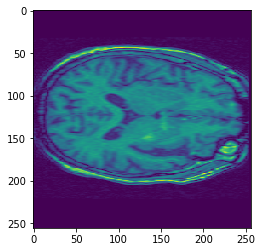

In [29]:
plt.imshow(cohort_test[:,128,:])

In [30]:
processCohort(rootDataPath,'c0001',1)

Processing: /tf/data/scans/c0001/c0001s0006t01/c0001s0006t01
Processing: /tf/data/scans/c0001/c0001s0007t01/c0001s0007t01
Processing: /tf/data/scans/c0001/c0001s0012t01/c0001s0012t01
Processing: /tf/data/scans/c0001/c0001s0005t01/c0001s0005t01
Processing: /tf/data/scans/c0001/c0001s0004t01/c0001s0004t01
Processing: /tf/data/scans/c0001/c0001s0008t01/c0001s0008t01


In [31]:
# cohort 2
rootDataPath = '/tf/data/scans'
cohort = 'c0002'
subject = 'c0002s0001t01'
cohort_test = brain_data = nib.load(rootDataPath+"/"+cohort+"/"+subject+"/"+subject+ "_resampled.nii.gz").get_fdata()

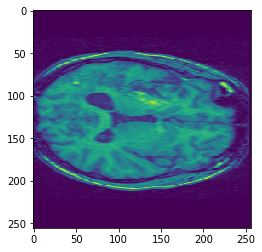

In [32]:
plt.imshow(cohort_test[:,128,:])

In [33]:
processCohort(rootDataPath,'c0002',1)

Processing: /tf/data/scans/c0002/c0002s0018t01/c0002s0018t01
Processing: /tf/data/scans/c0002/c0002s0012t01/c0002s0012t01
Processing: /tf/data/scans/c0002/c0002s0021t01/c0002s0021t01
Processing: /tf/data/scans/c0002/c0002s0022t01/c0002s0022t01
Processing: /tf/data/scans/c0002/c0002s0013t01/c0002s0013t01
Processing: /tf/data/scans/c0002/c0002s0008t01/c0002s0008t01
Processing: /tf/data/scans/c0002/c0002s0014t01/c0002s0014t01
Processing: /tf/data/scans/c0002/c0002s0024t01/c0002s0024t01
Processing: /tf/data/scans/c0002/c0002s0001t01/c0002s0001t01
Processing: /tf/data/scans/c0002/c0002s0027t01/c0002s0027t01
Processing: /tf/data/scans/c0002/c0002s0007t01/c0002s0007t01
Processing: /tf/data/scans/c0002/c0002s0017t01/c0002s0017t01
Processing: /tf/data/scans/c0002/c0002s0003t01/c0002s0003t01
Processing: /tf/data/scans/c0002/c0002s0020t01/c0002s0020t01
Processing: /tf/data/scans/c0002/c0002s0015t01/c0002s0015t01
Processing: /tf/data/scans/c0002/c0002s0023t01/c0002s0023t01
Processing: /tf/data/sca

In [34]:
# cohort 3A
rootDataPath = '/tf/data/scans'
cohort = 'c0003A'
subject = 'c0003s0001t01'
cohort_test = brain_data = nib.load(rootDataPath+"/"+cohort+"/"+subject+"/"+subject+ "_resampled.nii.gz").get_fdata()

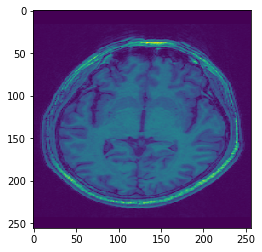

In [35]:
plt.imshow(cohort_test[:,128,:])

In [36]:
processCohort(rootDataPath,'c0003A',1)

Processing: /tf/data/scans/c0003A/c0003s0004t01/c0003s0004t01
Processing: /tf/data/scans/c0003A/c0003s0026t01/c0003s0026t01
Processing: /tf/data/scans/c0003A/c0003s0017t01/c0003s0017t01
Processing: /tf/data/scans/c0003A/c0003s0021t01/c0003s0021t01
Processing: /tf/data/scans/c0003A/c0003s0014t01/c0003s0014t01
Processing: /tf/data/scans/c0003A/c0003s0016t01/c0003s0016t01
Processing: /tf/data/scans/c0003A/c0003s0006t01/c0003s0006t01
Processing: /tf/data/scans/c0003A/c0003s0012t01/c0003s0012t01
Processing: /tf/data/scans/c0003A/c0003s0005t01/c0003s0005t01
Processing: /tf/data/scans/c0003A/c0003s0007t01/c0003s0007t01
Processing: /tf/data/scans/c0003A/c0003s0015t01/c0003s0015t01
Processing: /tf/data/scans/c0003A/c0003s0003t01/c0003s0003t01
Processing: /tf/data/scans/c0003A/c0003s0002t01/c0003s0002t01
Processing: /tf/data/scans/c0003A/c0003s0009t01/c0003s0009t01
Processing: /tf/data/scans/c0003A/c0003s0029t01/c0003s0029t01
Processing: /tf/data/scans/c0003A/c0003s0025t01/c0003s0025t01
Processi

In [37]:
# cohort 3B
rootDataPath = '/tf/data/scans'
cohort = 'c0003B'
subject = 'c0003s0030t01'
cohort_test = brain_data = nib.load(rootDataPath+"/"+cohort+"/"+subject+"/"+subject+ "_resampled.nii.gz").get_fdata()

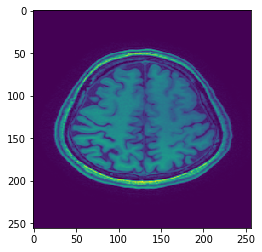

In [38]:
plt.imshow(cohort_test[:,200,:])

In [39]:
processCohort(rootDataPath,'c0003B',1)

Processing: /tf/data/scans/c0003B/c0003s0044t01/c0003s0044t01
Processing: /tf/data/scans/c0003B/c0003s0050t01/c0003s0050t01
Processing: /tf/data/scans/c0003B/c0003s0036t01/c0003s0036t01
Processing: /tf/data/scans/c0003B/c0003s0039t01/c0003s0039t01
Processing: /tf/data/scans/c0003B/c0003s0055t01/c0003s0055t01
Processing: /tf/data/scans/c0003B/c0003s0031t01/c0003s0031t01
Processing: /tf/data/scans/c0003B/c0003s0034t01/c0003s0034t01
Processing: /tf/data/scans/c0003B/c0003s0041t01/c0003s0041t01
Processing: /tf/data/scans/c0003B/c0003s0032t01/c0003s0032t01
Processing: /tf/data/scans/c0003B/c0003s0045t01/c0003s0045t01
Processing: /tf/data/scans/c0003B/c0003s0038t01/c0003s0038t01
Processing: /tf/data/scans/c0003B/c0003s0054t01/c0003s0054t01
Processing: /tf/data/scans/c0003B/c0003s0037t01/c0003s0037t01
Processing: /tf/data/scans/c0003B/c0003s0035t01/c0003s0035t01
Processing: /tf/data/scans/c0003B/c0003s0040t01/c0003s0040t01
Processing: /tf/data/scans/c0003B/c0003s0046t01/c0003s0046t01
Processi

In [40]:
# cohort 4
rootDataPath = '/tf/data/scans'
cohort = 'c0004'
subject = 'c0004s0001t01'
cohort_test = brain_data = nib.load(rootDataPath+"/"+cohort+"/"+subject+"/"+subject+ "_resampled.nii.gz").get_fdata()

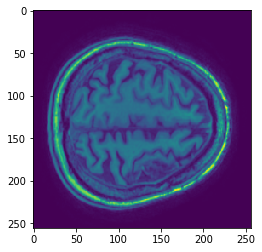

In [41]:
plt.imshow(cohort_test[:,:,200])

In [42]:
processCohort(rootDataPath,'c0004',2)

Processing: /tf/data/scans/c0004/c0004s0026t01/c0004s0026t01
Processing: /tf/data/scans/c0004/c0004s0027t01/c0004s0027t01
Processing: /tf/data/scans/c0004/c0004s0021t01/c0004s0021t01
Processing: /tf/data/scans/c0004/c0004s0023t01/c0004s0023t01
Processing: /tf/data/scans/c0004/c0004s0005t01/c0004s0005t01
Processing: /tf/data/scans/c0004/c0004s0022t01/c0004s0022t01
Processing: /tf/data/scans/c0004/c0004s0016t01/c0004s0016t01
Processing: /tf/data/scans/c0004/c0004s0006t01/c0004s0006t01
Processing: /tf/data/scans/c0004/c0004s0015t01/c0004s0015t01
Processing: /tf/data/scans/c0004/c0004s0010t01/c0004s0010t01
Processing: /tf/data/scans/c0004/c0004s0034t01/c0004s0034t01
Processing: /tf/data/scans/c0004/c0004s0024t01/c0004s0024t01
Processing: /tf/data/scans/c0004/c0004s0008t01/c0004s0008t01
Processing: /tf/data/scans/c0004/c0004s0019t01/c0004s0019t01
Processing: /tf/data/scans/c0004/c0004s0002t01/c0004s0002t01
Processing: /tf/data/scans/c0004/c0004s0030t01/c0004s0030t01
Processing: /tf/data/sca

In [43]:
# cohort 5
rootDataPath = '/tf/data/scans'
cohort = 'c0005'
subject = 'c0005s0003t01'
cohort_test = brain_data = nib.load(rootDataPath+"/"+cohort+"/"+subject+"/"+subject+ "_resampled.nii.gz").get_fdata()

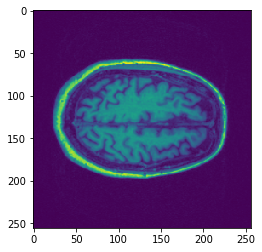

In [44]:
plt.imshow(cohort_test[:,:,200])

In [45]:
processCohort(rootDataPath,'c0005',2)

Processing: /tf/data/scans/c0005/c0005s0042t01/c0005s0042t01
Processing: /tf/data/scans/c0005/c0005s0048t01/c0005s0048t01
Processing: /tf/data/scans/c0005/c0005s0040t01/c0005s0040t01
Processing: /tf/data/scans/c0005/c0005s0047t01/c0005s0047t01
Processing: /tf/data/scans/c0005/c0005s0017t01/c0005s0017t01
Processing: /tf/data/scans/c0005/c0005s0018t01/c0005s0018t01
Processing: /tf/data/scans/c0005/c0005s0007t01/c0005s0007t01
Processing: /tf/data/scans/c0005/c0005s0049t01/c0005s0049t01
Processing: /tf/data/scans/c0005/c0005s0035t01/c0005s0035t01
Processing: /tf/data/scans/c0005/c0005s0027t01/c0005s0027t01
Processing: /tf/data/scans/c0005/c0005s0044t01/c0005s0044t01
Processing: /tf/data/scans/c0005/c0005s0011t01/c0005s0011t01
Processing: /tf/data/scans/c0005/c0005s0009t01/c0005s0009t01
Processing: /tf/data/scans/c0005/c0005s0006t01/c0005s0006t01
Processing: /tf/data/scans/c0005/c0005s0043t01/c0005s0043t01
Processing: /tf/data/scans/c0005/c0005s0010t01/c0005s0010t01
Processing: /tf/data/sca

In [46]:
# cohort 6
rootDataPath = '/tf/data/scans'
cohort = 'c0006'
subject = 'c0006s0001t01'
cohort_test = brain_data = nib.load(rootDataPath+"/"+cohort+"/"+subject+"/"+subject+ "_resampled.nii.gz").get_fdata()

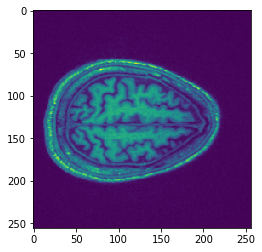

In [47]:
plt.imshow(cohort_test[:,:,200])

In [48]:
processCohort(rootDataPath,'c0006',2)

Processing: /tf/data/scans/c0006/c0006s0003t01/c0006s0003t01
Processing: /tf/data/scans/c0006/c0006s0018t01/c0006s0018t01
Processing: /tf/data/scans/c0006/c0006s0004t01/c0006s0004t01
Processing: /tf/data/scans/c0006/c0006s0020t01/c0006s0020t01
Processing: /tf/data/scans/c0006/c0006s0008t01/c0006s0008t01
Processing: /tf/data/scans/c0006/c0006s0005t01/c0006s0005t01
Processing: /tf/data/scans/c0006/c0006s0007t01/c0006s0007t01
Processing: /tf/data/scans/c0006/c0006s0014t01/c0006s0014t01
Processing: /tf/data/scans/c0006/c0006s0001t01/c0006s0001t01
Processing: /tf/data/scans/c0006/c0006s0010t01/c0006s0010t01
Processing: /tf/data/scans/c0006/c0006s0019t01/c0006s0019t01
Processing: /tf/data/scans/c0006/c0006s0006t01/c0006s0006t01


In [49]:
# cohort 7
rootDataPath = '/tf/data/scans'
cohort = 'c0007'
subject = 'c0007s0001t01'
cohort_test = brain_data = nib.load(rootDataPath+"/"+cohort+"/"+subject+"/"+subject+ "_resampled.nii.gz").get_fdata()

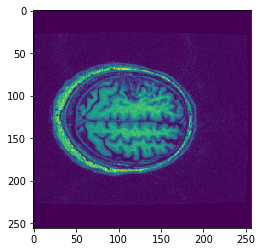

In [50]:
plt.imshow(cohort_test[:,:,200])

In [51]:
processCohort(rootDataPath,'c0007',2)

Processing: /tf/data/scans/c0007/c0007s0006t01/c0007s0006t01
Processing: /tf/data/scans/c0007/c0007s0032t01/c0007s0032t01
Processing: /tf/data/scans/c0007/c0007s0028t01/c0007s0028t01
Processing: /tf/data/scans/c0007/c0007s0001t01/c0007s0001t01
Processing: /tf/data/scans/c0007/c0007s0035t01/c0007s0035t01
Processing: /tf/data/scans/c0007/c0007s0017t01/c0007s0017t01
Processing: /tf/data/scans/c0007/c0007s0024t01/c0007s0024t01
Processing: /tf/data/scans/c0007/c0007s0008t01/c0007s0008t01
Processing: /tf/data/scans/c0007/c0007s0005t01/c0007s0005t01
Processing: /tf/data/scans/c0007/c0007s0015t01/c0007s0015t01
Processing: /tf/data/scans/c0007/c0007s0020t01/c0007s0020t01
Processing: /tf/data/scans/c0007/c0007s0004t01/c0007s0004t01
Processing: /tf/data/scans/c0007/c0007s0009t01/c0007s0009t01
Processing: /tf/data/scans/c0007/c0007s0026t01/c0007s0026t01
Processing: /tf/data/scans/c0007/c0007s0018t01/c0007s0018t01
Processing: /tf/data/scans/c0007/c0007s0025t01/c0007s0025t01
Processing: /tf/data/sca

In [52]:
# cohort 8
rootDataPath = '/tf/data/scans'
cohort = 'c0008'
subject = 'c0008s0001t01'
cohort_test = brain_data = nib.load(rootDataPath+"/"+cohort+"/"+subject+"/"+subject+ "_resampled.nii.gz").get_fdata()

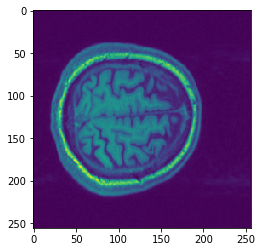

In [53]:
plt.imshow(cohort_test[:,:,200])

In [54]:
processCohort(rootDataPath,'c0008',2)

Processing: /tf/data/scans/c0008/c0008s0014t01/c0008s0014t01
Processing: /tf/data/scans/c0008/c0008s0026t01/c0008s0026t01
Processing: /tf/data/scans/c0008/c0008s0024t01/c0008s0024t01
Processing: /tf/data/scans/c0008/c0008s0005t01/c0008s0005t01
Processing: /tf/data/scans/c0008/c0008s0015t01/c0008s0015t01
Processing: /tf/data/scans/c0008/c0008s0007t01/c0008s0007t01
Processing: /tf/data/scans/c0008/c0008s0010t01/c0008s0010t01
Processing: /tf/data/scans/c0008/c0008s0020t01/c0008s0020t01
Processing: /tf/data/scans/c0008/c0008s0009t01/c0008s0009t01
Processing: /tf/data/scans/c0008/c0008s0029t01/c0008s0029t01
Processing: /tf/data/scans/c0008/c0008s0031t01/c0008s0031t01
Processing: /tf/data/scans/c0008/c0008s0019t01/c0008s0019t01
Processing: /tf/data/scans/c0008/c0008s0033t01/c0008s0033t01
Processing: /tf/data/scans/c0008/c0008s0032t01/c0008s0032t01
Processing: /tf/data/scans/c0008/c0008s0018t01/c0008s0018t01
Processing: /tf/data/scans/c0008/c0008s0021t01/c0008s0021t01
Processing: /tf/data/sca

In [55]:
# cohort 9
rootDataPath = '/tf/data/scans'
cohort = 'c0009'
subject = 'c0009s0001t01'
cohort_test = brain_data = nib.load(rootDataPath+"/"+cohort+"/"+subject+"/"+subject+ "_resampled.nii.gz").get_fdata()

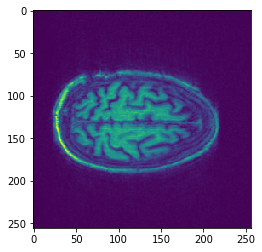

In [56]:
plt.imshow(cohort_test[:,:,200])

In [57]:
processCohort(rootDataPath,'c0009',2)

Processing: /tf/data/scans/c0009/c0009s0001t01/c0009s0001t01
Processing: /tf/data/scans/c0009/c0009s0005t01/c0009s0005t01
Processing: /tf/data/scans/c0009/c0009s0008t01/c0009s0008t01
Processing: /tf/data/scans/c0009/c0009s0010t01/c0009s0010t01
Processing: /tf/data/scans/c0009/c0009s0004t01/c0009s0004t01
Processing: /tf/data/scans/c0009/c0009s0007t01/c0009s0007t01
Processing: /tf/data/scans/c0009/c0009s0011t01/c0009s0011t01
Processing: /tf/data/scans/c0009/c0009s0002t01/c0009s0002t01
Processing: /tf/data/scans/c0009/c0009s0006t01/c0009s0006t01
Processing: /tf/data/scans/c0009/c0009s0012t01/c0009s0012t01
Processing: /tf/data/scans/c0009/c0009s0003t01/c0009s0003t01
Processing: /tf/data/scans/c0009/c0009s0009t01/c0009s0009t01


In [58]:
# cohort 10
rootDataPath = '/tf/data/scans'
cohort = 'c0010'
subject = 'c0010s0001t01'
cohort_test = brain_data = nib.load(rootDataPath+"/"+cohort+"/"+subject+"/"+subject+ "_resampled.nii.gz").get_fdata()

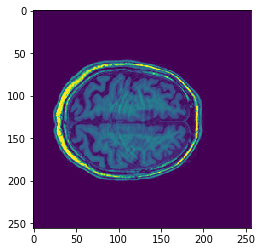

In [59]:
plt.imshow(cohort_test[:,:,200])

In [60]:
processCohort(rootDataPath,'c0010',2)

Processing: /tf/data/scans/c0010/c0010s0025t02/c0010s0025t02
Processing: /tf/data/scans/c0010/c0010s0042t01/c0010s0042t01
Processing: /tf/data/scans/c0010/c0010s0028t01/c0010s0028t01
Processing: /tf/data/scans/c0010/c0010s0005t01/c0010s0005t01
Processing: /tf/data/scans/c0010/c0010s0022t02/c0010s0022t02
Processing: /tf/data/scans/c0010/c0010s0032t01/c0010s0032t01
Processing: /tf/data/scans/c0010/c0010s0003t02/c0010s0003t02
Processing: /tf/data/scans/c0010/c0010s0018t01/c0010s0018t01
Processing: /tf/data/scans/c0010/c0010s0044t01/c0010s0044t01
Processing: /tf/data/scans/c0010/c0010s0003t01/c0010s0003t01
Processing: /tf/data/scans/c0010/c0010s0020t02/c0010s0020t02
Processing: /tf/data/scans/c0010/c0010s0013t02/c0010s0013t02
Processing: /tf/data/scans/c0010/c0010s0041t01/c0010s0041t01
Processing: /tf/data/scans/c0010/c0010s0005t02/c0010s0005t02
Processing: /tf/data/scans/c0010/c0010s0004t01/c0010s0004t01
Processing: /tf/data/scans/c0010/c0010s0037t01/c0010s0037t01
Processing: /tf/data/sca

In [61]:
# cohort 11
rootDataPath = '/tf/data/scans'
cohort = 'c0011'
subject = 'c0011s0001t01'
cohort_test = brain_data = nib.load(rootDataPath+"/"+cohort+"/"+subject+"/"+subject+ "_resampled.nii.gz").get_fdata()

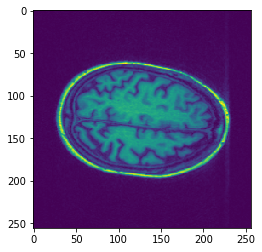

In [62]:
plt.imshow(cohort_test[:,:,200])

In [63]:
processCohort(rootDataPath,'c0011',2)

Processing: /tf/data/scans/c0011/c0011s0003t01/c0011s0003t01
Processing: /tf/data/scans/c0011/c0011s0015t01/c0011s0015t01
Processing: /tf/data/scans/c0011/c0011s0006t01/c0011s0006t01
Processing: /tf/data/scans/c0011/c0011s0011t01/c0011s0011t01
Processing: /tf/data/scans/c0011/c0011s0012t01/c0011s0012t01
Processing: /tf/data/scans/c0011/c0011s0013t01/c0011s0013t01
Processing: /tf/data/scans/c0011/c0011s0008t01/c0011s0008t01
Processing: /tf/data/scans/c0011/c0011s0010t01/c0011s0010t01
Processing: /tf/data/scans/c0011/c0011s0004t01/c0011s0004t01
Processing: /tf/data/scans/c0011/c0011s0002t01/c0011s0002t01
Processing: /tf/data/scans/c0011/c0011s0005t01/c0011s0005t01
Processing: /tf/data/scans/c0011/c0011s0014t01/c0011s0014t01
Processing: /tf/data/scans/c0011/c0011s0009t01/c0011s0009t01
Processing: /tf/data/scans/c0011/c0011s0007t01/c0011s0007t01
Processing: /tf/data/scans/c0011/c0011s0001t01/c0011s0001t01


In [64]:
# Create SegNet Dataset

import random
import shutil
import os
import numpy as np
from PIL import Image

rootDataPath = '/tf/data/scans/'

datasetPath = '/tf/data/dataset/'

trainingPath = datasetPath + 'train/'
trainingAnnotationPath = datasetPath + 'train_annotation/'

validationPath = datasetPath + 'val/'
validationAnnotationPath = datasetPath + 'val_annotation/'

testPath = datasetPath + 'test/'
testAnnotationPath = datasetPath + 'test_annotation/'

if not os.path.exists(trainingPath):
    os.mkdir(trainingPath)
    
if not os.path.exists(trainingAnnotationPath):
    os.mkdir(trainingAnnotationPath)
    
if not os.path.exists(validationPath):
    os.mkdir(validationPath)
    
if not os.path.exists(validationAnnotationPath):
    os.mkdir(validationAnnotationPath)
    
if not os.path.exists(testPath):
    os.mkdir(testPath)
    
if not os.path.exists(testAnnotationPath):
    os.mkdir(testAnnotationPath)

# Percentages to split the data by.
training = 80
validation =15
test = 5

total_training = 0;
total_test = 0;
total_validation = 0;
total_copied = 0;

train_file = open(datasetPath + "train.txt", "w")
val_file = open(datasetPath + "val.txt", "w")
test_file = open(datasetPath + "test.txt", "w")


cohorts = [dI for dI in os.listdir(rootDataPath) if os.path.isdir(os.path.join(rootDataPath,dI))]
for cohort in cohorts:
    cohort_path = rootDataPath + cohort
    subjects = [dI for dI in os.listdir(cohort_path) if os.path.isdir(os.path.join(cohort_path,dI))]
    for subject in subjects:
        subject_path = cohort_path + "/" + subject
        png_path = subject_path + "/" + "png/"
        
        # Get all the images and move them to the right place.
        for i in range(0,255):
            brain_img_name = subject + "_slice_"+str(i)+".png"  
            mask_img_name = subject + "_mask_slice_"+str(i)+".png"
            
            brain_path = png_path + brain_img_name
            mask_path = png_path + mask_img_name
            
            dest_path_img = datasetPath;
            dest_path_mask = datasetPath;
            file_to_update = train_file
            val = random.randint(1,100)
            if val < training:
                dest_path_img = trainingPath
                dest_path_mask = trainingAnnotationPath
                total_training = total_training + 1
                file_to_update = train_file
            elif val >= training and val < training + validation:
                dest_path_img = validationPath
                dest_path_mask = validationAnnotationPath
                total_validation = total_validation + 1
                file_to_update = val_file
            else:
                dest_path_img = testPath
                dest_path_mask = testAnnotationPath
                total_test = total_test + 1
                file_to_update = test_file
                
            dest_path_img = dest_path_img + brain_img_name
            dest_path_mask = dest_path_mask + brain_img_name
            
            im = Image.open(mask_path)
            np_img = np.array(im)
            
            if np.max(np_img) == 1:
                shutil.copyfile(brain_path, dest_path_img)
                shutil.copyfile(mask_path, dest_path_mask)
                file_to_update.write(dest_path_img + " " + dest_path_mask + "\n")

                total_copied = total_copied + 1
train_file.close()
val_file.close()
test_file.close()
print("Test: %.2f, Val: %.2f, Test %.2f" % (total_training / total_copied * 100, total_validation / total_copied * 100, total_test / total_copied * 100))

Test: 412.87, Val: 77.96, Test 31.19
